In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL25zaXJtcGlsYXR6ZS9Db2RlL05JVS9hbmltYWxzLWluLW1vdGlvbi9ib29r'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/importlib/_bootstrap.py": 1750062420.4195485, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/importlib/_bootstrap_external.py": 1750062420.422667, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/zipimport.py": 1750062418.968003, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/codecs.py": 1750062418.5286918, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/encodings/aliases.py": 1750062419.4695196, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/encodings/__init__.py": 1750062419.4666219, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/encodings/utf_8.py": 1750062419.879118, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/abc.py": 1750062418.4244814, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/io.py": 1750062418.692546, "/Users/nsi

In [2]:
#| include: false
import xarray as xr

xr.set_options(
    display_expand_attrs=False,
    display_expand_coords=False,
    keep_attrs=True,
)

In [3]:
from movement import sample_data

SHA256 hash of downloaded file: fc04901d84035f6e6897d71f6bf098517170ebce37c31c6a31e45fbdf83dd64b
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [4]:
poses_ds = sample_data.fetch_dataset("SLEAP_two-mice_octagon.analysis.h5")
poses_ds

<xarray.Dataset> Size: 2MB
Dimensions:      (time: 9000, space: 2, keypoints: 7, individuals: 2)
Coordinates: (4)
Data variables:
    position     (time, space, keypoints, individuals) float32 1MB 796.5 ... nan
    confidence   (time, keypoints, individuals) float32 504kB 0.9292 ... 0.0
Attributes: (6)

In [5]:
#| output: false
bboxes_ds = sample_data.fetch_dataset("VIA_single-crab_MOCA-crab-1_linear-interp.csv")

2025-08-10 10:32:11.593 | WARNING  | movement.validators.datasets:__attrs_post_init__:425 - Frame numbers were not provided. Setting to an array of 0-based integers.


In [6]:
bboxes_ds

<xarray.Dataset> Size: 8kB
Dimensions:      (time: 168, space: 2, individuals: 1)
Coordinates: (3)
Data variables:
    position     (time, space, individuals) float64 3kB 1.118e+03 ... 401.9
    shape        (time, space, individuals) float64 3kB 320.1 153.2 ... 120.1
    confidence   (time, individuals) float64 1kB nan nan nan nan ... nan nan nan
Attributes: (6)

In [7]:
print(f"Source software: {poses_ds.source_software}")
print(f"Frames per second: {poses_ds.fps}")

poses_ds.position

Source software: SLEAP
Frames per second: 50.0


<xarray.DataArray 'position' (time: 9000, space: 2, keypoints: 7, individuals: 2)> Size: 1MB
796.5 724.5 812.8 721.0 816.9 704.9 821.1 ... 572.4 116.7 552.8 124.5 539.9 nan
Coordinates: (4)

In [8]:
# First individual, first time point
poses_ds.position.isel(individuals=0, time=0)

# 0-10 seconds, two specific keypoints
poses_ds.position.sel(time=slice(0, 10), keypoints=["EarLeft", "EarRight"])

<xarray.DataArray 'position' (time: 501, space: 2, keypoints: 2, individuals: 2)> Size: 16kB
812.8 721.0 816.9 704.9 853.0 984.8 ... 359.9 340.0 852.2 811.8 835.9 800.6
Coordinates: (4)

In [9]:
# Each point's median confidence score across time
poses_ds.confidence.median(dim="time")

# Take the block mean for every 10 frames.
poses_ds.position.coarsen(time=10, boundary="trim").mean()

<xarray.DataArray 'position' (time: 900, space: 2, keypoints: 7, individuals: 2)> Size: 101kB
757.0 733.4 771.6 725.0 779.1 711.3 ... 553.9 116.5 544.9 124.2 541.0 128.6
Coordinates: (4)

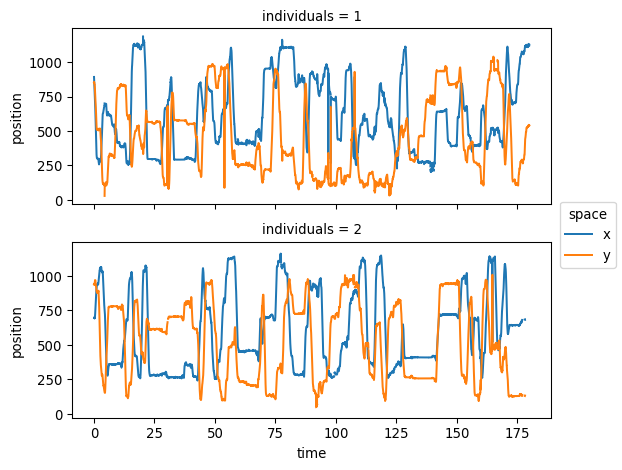

In [10]:
#| label: fig-plot-tail-base-pos
#| fig-cap: The x,y spatial coordinates of the TailBase keypoint across time

from matplotlib import pyplot as plt

tail_base_pos = poses_ds.sel(keypoints="TailBase").position
tail_base_pos.plot.line(
    x="time", row="individuals", hue="space", aspect=2, size=2.5
)
plt.show()

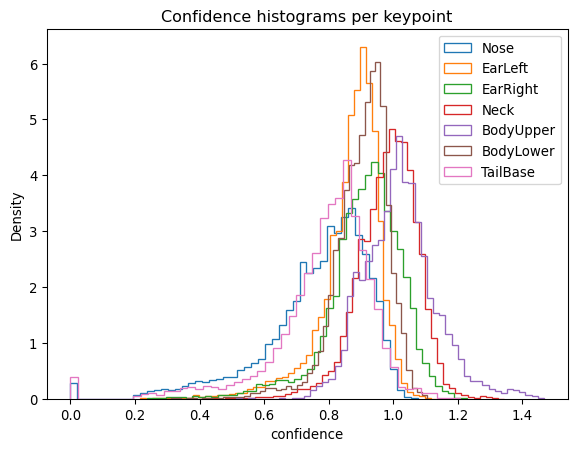

In [11]:
#| label: fig-plot-confidence-histograms
#| fig-cap: Confidence histograms per keypoint

colors = plt.cm.tab10.colors

fig, ax = plt.subplots()
for kp, color in zip(poses_ds.keypoints, colors):
    data = poses_ds.confidence.sel(keypoints=kp)
    data.plot.hist(
        bins=50, histtype="step", density=True, ax=ax, color=color, label=kp
    )
ax.set_ylabel("Density")
ax.set_title("Confidence histograms per keypoint")
plt.legend()
plt.show()

In [12]:
position_df = poses_ds.position.to_dataframe(
    dim_order=["time", "individuals", "keypoints", "space"]
)
position_df.head()

position
time individuals keypoints space            
0.0  1           Nose      x      796.473145
                           y      843.941101
                 EarLeft   x      812.779114
                           y      853.027039
                 EarRight  x      816.932190

In [13]:
position_array = poses_ds.position.values
print(f"Position array shape: {position_array.shape}")

time_array = poses_ds.time.values
print(f"Time array shape: {time_array.shape}")

Position array shape: (9000, 2, 7, 2)
Time array shape: (9000,)


In [14]:
from pathlib import Path
from movement.io import load_poses

file_name = "mouse044_task1_annotator1.slp"
file_path = Path.home() / ".movement" / "CalMS21" / file_name

ds = load_poses.from_file(file_path, source_software="SLEAP", fps=30)
ds

<xarray.Dataset> Size: 598kB
Dimensions:      (time: 3394, space: 2, keypoints: 7, individuals: 2)
Coordinates: (4)
Data variables:
    position     (time, space, keypoints, individuals) float32 380kB 854.4 .....
    confidence   (time, keypoints, individuals) float32 190kB nan nan ... nan
Attributes: (5)

In [15]:
for space_coord in ["x", "y"]:
    min_pos = ds.position.sel(space=space_coord).min().values
    max_pos = ds.position.sel(space=space_coord).max().values
    print(f"Min-Max {space_coord} positions: {min_pos:.2f}-{max_pos:.2f}")

Min-Max x positions: 83.79-988.99
Min-Max y positions: 64.72-563.30


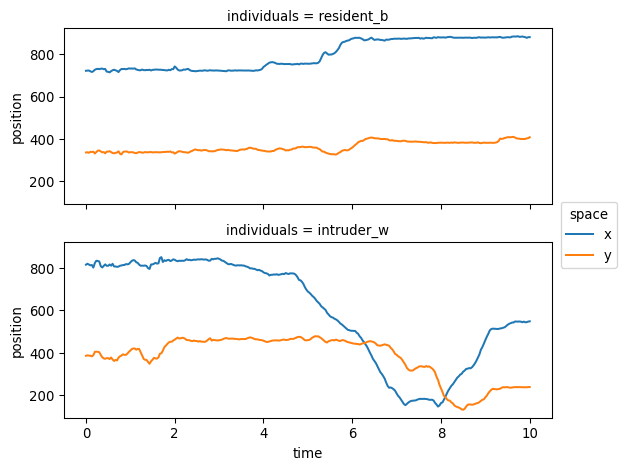

In [16]:
ds.position.sel(keypoints="tail_base", time=slice(0, 10)).plot.line(
    x="time", row="individuals", hue="space", aspect=2, size=2.5
)

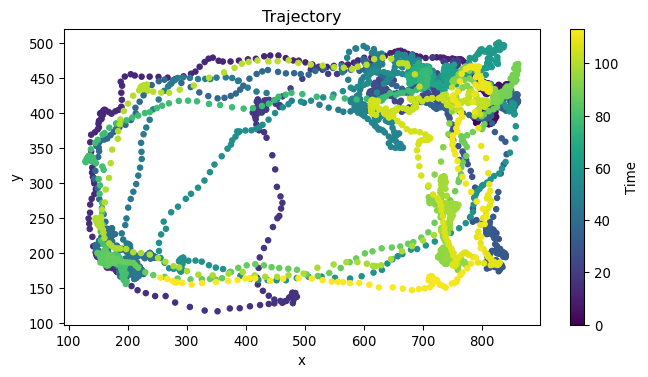

In [17]:
from movement.plots import plot_centroid_trajectory

fig, ax = plt.subplots(figsize=(8, 4))
plot_centroid_trajectory(ds.position, individual="resident_b", ax=ax)
plt.show()

Number of frames: 3394
Frame size: 1024x570
Number of channels: 1



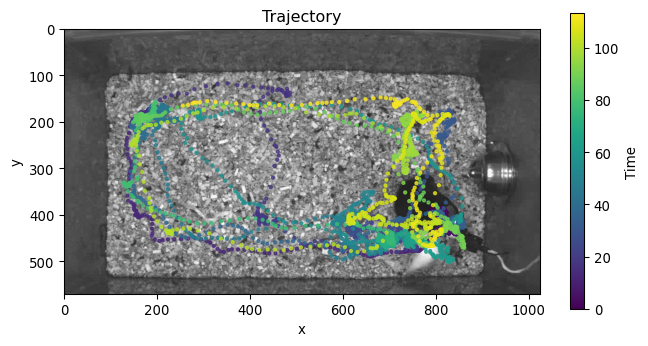

In [18]:
import sleap_io as sio


video_path = Path.home() / ".movement" / "CalMS21" / "mouse044_task1_annotator1.mp4"
video = sio.load_video(video_path)

n_frames, height, width, channels = video.shape
print(f"Number of frames: {n_frames}")
print(f"Frame size: {width}x{height}")
print(f"Number of channels: {channels}\n")

# Extract the first frame to use as background
background = video[0]

fig, ax = plt.subplots(figsize=(8, 4))

# Plot the first video frame
ax.imshow(background, cmap="gray")

# Plot the centroid trajectory
plot_centroid_trajectory(
    ds.position, individual="resident_b", ax=ax, alpha=0.75, s=5,
)

plt.show()

In [19]:
ds_oct = sample_data.fetch_dataset("SLEAP_two-mice_octagon.analysis.h5")
ds_oct

<xarray.Dataset> Size: 2MB
Dimensions:      (time: 9000, space: 2, keypoints: 7, individuals: 2)
Coordinates: (4)
Data variables:
    position     (time, space, keypoints, individuals) float32 1MB 796.5 ... nan
    confidence   (time, keypoints, individuals) float32 504kB 0.9292 ... 0.0
Attributes: (6)

In [20]:
from movement.filtering import (
    filter_by_confidence,
    rolling_filter,
    interpolate_over_time,
)

confidence_threshold = 0.8

ds_oct["position_filtered"] = filter_by_confidence(
    ds_oct.position,
    ds_oct.confidence,
    threshold=confidence_threshold,
    print_report=True
)

Missing points (marked as NaN) in input:

keypoints                Nose           EarLeft          EarRight              Neck         BodyUpper         BodyLower          TailBase
individuals                                                                                                                              
1            107/9000 (1.19%)     9/9000 (0.1%)     9/9000 (0.1%)     9/9000 (0.1%)     9/9000 (0.1%)     9/9000 (0.1%)   44/9000 (0.49%)
2            272/9000 (3.02%)  260/9000 (2.89%)  260/9000 (2.89%)  260/9000 (2.89%)  260/9000 (2.89%)  260/9000 (2.89%)  392/9000 (4.36%)
Missing points (marked as NaN) in output:

keypoints                  Nose             EarLeft            EarRight              Neck         BodyUpper           BodyLower            TailBase
individuals                                                                                                                                        
1            3972/9000 (44.13%)  1441/9000 (16.01%)  1200/9000 (13.

In [21]:
ds_oct["position_smoothed"] = rolling_filter(
    ds_oct.position_filtered,
    window=5,
    statistic="median",
    min_periods=2,
    print_report=True
)

Missing points (marked as NaN) in input:

keypoints                  Nose             EarLeft            EarRight              Neck         BodyUpper           BodyLower            TailBase
individuals                                                                                                                                        
1            3972/9000 (44.13%)  1441/9000 (16.01%)  1200/9000 (13.33%)  390/9000 (4.33%)     9/9000 (0.1%)    520/9000 (5.78%)  3337/9000 (37.08%)
2            5143/9000 (57.14%)  1826/9000 (20.29%)  1324/9000 (14.71%)  489/9000 (5.43%)  524/9000 (5.82%)  1382/9000 (15.36%)  4899/9000 (54.43%)
Missing points (marked as NaN) in output:

keypoints                  Nose             EarLeft            EarRight              Neck         BodyUpper          BodyLower            TailBase
individuals                                                                                                                                       
1            3583/9000 (39.81

In [22]:
ds_oct["position_interpolated"] = interpolate_over_time(
    ds_oct.position_smoothed,
    method="linear",
    max_gap=10,
    print_report=True
)

Missing points (marked as NaN) in input:

keypoints                  Nose             EarLeft            EarRight              Neck         BodyUpper          BodyLower            TailBase
individuals                                                                                                                                       
1            3583/9000 (39.81%)  1196/9000 (13.29%)  1019/9000 (11.32%)   270/9000 (3.0%)    4/9000 (0.04%)   349/9000 (3.88%)  2821/9000 (31.34%)
2            4741/9000 (52.68%)  1493/9000 (16.59%)   994/9000 (11.04%)  314/9000 (3.49%)  341/9000 (3.79%)  970/9000 (10.78%)  4296/9000 (47.73%)
Missing points (marked as NaN) in output:

keypoints                  Nose             EarLeft          EarRight             Neck         BodyUpper         BodyLower            TailBase
individuals                                                                                                                                   
1            3394/9000 (37.71%)  1009/900

In [23]:
ds_oct

<xarray.Dataset> Size: 5MB
Dimensions:                (time: 9000, space: 2, keypoints: 7, individuals: 2)
Coordinates: (4)
Data variables:
    position               (time, space, keypoints, individuals) float32 1MB ...
    confidence             (time, keypoints, individuals) float32 504kB 0.929...
    position_filtered      (time, space, keypoints, individuals) float32 1MB ...
    position_smoothed      (time, space, keypoints, individuals) float32 1MB ...
    position_interpolated  (time, space, keypoints, individuals) float32 1MB ...
Attributes: (6)

In [24]:
print(ds_oct.position_interpolated.log)

[
  {
    "operation": "filter_by_confidence",
    "datetime": "2025-08-10 10:32:18.789076",
    "confidence": "<xarray.DataArray 'confidence' (time: 9000, keypoints: 7, individuals: 2)> Size: 504kB\n0.9292 0.8582 0.9183 0.9426 0.9423 1.033 ... 0.8551 0.9173 0.598 0.8343 0.0\nCoordinates: (3)",
    "threshold": "0.8",
    "print_report": "True"
  },
  {
    "operation": "rolling_filter",
    "datetime": "2025-08-10 10:32:18.805979",
    "window": "5",
    "statistic": "'median'",
    "min_periods": "2",
    "print_report": "True"
  },
  {
    "operation": "interpolate_over_time",
    "datetime": "2025-08-10 10:32:19.031273",
    "method": "'linear'",
    "max_gap": "10",
    "print_report": "True"
  }
]


In [25]:
position_all_steps = xr.concat(
    [
        ds_oct.position,
        ds_oct.position_filtered,
        ds_oct.position_smoothed,
        ds_oct.position_interpolated
    ],
    dim="step"
).assign_coords(step=["original", "filtered", "smoothed", "interpolated"])

position_all_steps

<xarray.DataArray 'position' (step: 4, time: 9000, space: 2, keypoints: 7,
                              individuals: 2)> Size: 4MB
796.5 724.5 812.8 721.0 816.9 704.9 821.1 ... 564.4 116.7 548.6 nan 539.9 nan
Coordinates: (5)

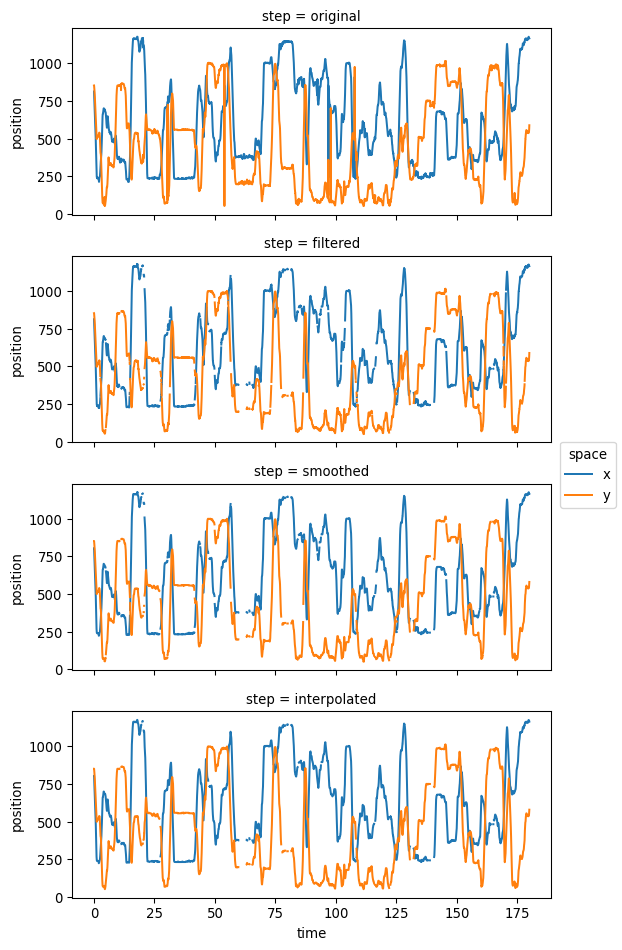

In [26]:
position_all_steps.sel(individuals="1", keypoints="EarLeft").plot.line(
    x="time", row="step", hue="space", aspect=2, size=2.5
)
plt.show()

In [27]:
from movement.kinematics import (
    compute_speed,
    compute_path_length,
    compute_pairwise_distances,
)

In [28]:
ds_oct["centroid_position"] = ds_oct.position_interpolated.mean(dim="keypoints")
ds_oct["centroid_speed"] = compute_speed(ds_oct.centroid_position)

ds_oct.centroid_speed

<xarray.DataArray 'centroid_speed' (time: 9000, individuals: 2)> Size: 72kB
401.3 23.79 384.8 41.19 508.6 73.54 629.7 ... 282.9 25.0 132.6 2.656 1.139 0.0
Coordinates: (2)

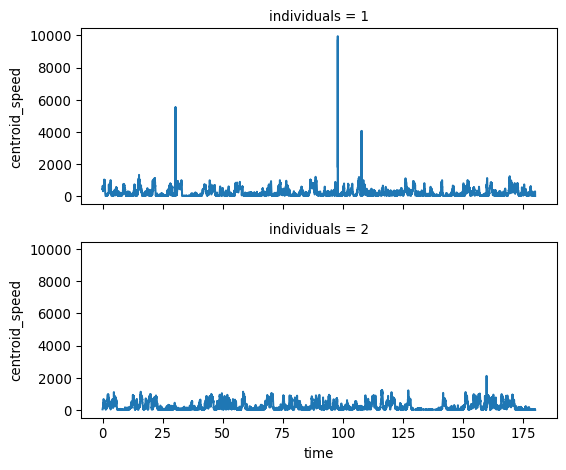

In [29]:
ds_oct.centroid_speed.plot.line(x="time", row="individuals", aspect=2, size=2.5)
plt.show()

In [30]:
ds_oct["path_length"] = compute_path_length(
    ds_oct.centroid_position.sel(time=slice(50, 100))
)

ds_oct.path_length

<xarray.DataArray 'path_length' (individuals: 2)> Size: 8B
1.047e+04 1.094e+04
Coordinates: (1)
Attributes: (1)

In [31]:
ds_oct["inter_individual_distance"] = compute_pairwise_distances(
    ds_oct.centroid_position,
    dim="individuals",
    pairs={"1": "2"}
)

ds_oct.inter_individual_distance

<xarray.DataArray 'inter_individual_distance' (time: 9000)> Size: 72kB
177.2 172.2 168.7 162.3 159.0 157.3 ... 672.7 674.2 675.6 679.4 682.9 683.0
Coordinates: (1)
Attributes: (1)

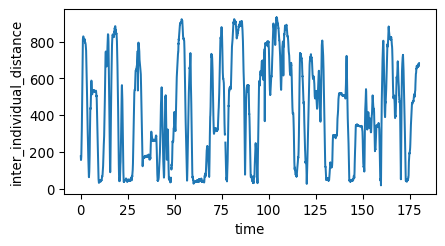

In [32]:
ds_oct.inter_individual_distance.plot.line(x="time", aspect=2, size=2.5)
plt.show()